 # Movie Revenue Prediction

### Project overview
The client is a movie studio and they need to be able to predict movie revenue in order to greenlight the project and assign a budget to it. Most of the data is comprised of categorical variables. While the budget for the movie is known in the dataset it is often an unknown variable during the greenlighting process. 

### Prediction Basis

Since predicting a movie's revenue in itself is a challenge, additionally the budget amount remains elusive makes it a difficult business problem as there is no base-line to establish the prediction.


# I- Executive Summary

Analyze available data to predict a movie revenue and finally assign a budget during green-lighting process.

# II- Business Understanding

### Define Organization  

Client is a movie studio in the business of producing, sponsoring and financing movies.



###  Intended Stakeholders of Data  

Movie producers, finance & budget managers.

###  Define Business Objectives   

based on the input parameters, a movie's revenue is to be predicted.

###  Background   

### Business Objectives   

•	Which variables can help in predicting revenue figures?
•	determine which parameters had the most effect on a movie revenue?
•	Limiting the problem to predicting just the revenue amounts.
•	Evaluate and cross-validate the revenue figures.

### Business Success Criteria  

Predicting the movie revenue as accurately as possible, and making the **REVENUE** as the **TARGET VARIABLE** or **OUTCOME**. Since the revenue is a whole-number, a Regression will be developed.

### Assumptions, and Constraints   

Assumptions: data is accurate and reliable.

### Terminology  - Code book - Data Dictionary 

A lead is a person who has indicated interest in your company's product or service in some way, shape, or form.

- title	- title of the movie
- tagline - few words for movie presentation	
- revenue - revenue generated by the movie	
- budget - planned expenditure	
- genres - categorical group of the movie
- homepage - movie promotional website
- id - movie id
- keywords - tags associated with the movie
- original_language	- original movie language 
- overview - movie synopsis
- production_companies	- sponsoring and producing comapnies
- production_countries	- locations of the movie made
- release_date	- movie available for viewing date.
- runtime	- movie duration
- spoken_languages	- spoken languages in the movie
- status - movie status for viewing


### Project Plan   

gets updated as per the succeding stages.

modelling planned to use: Multiple Linear Regression,  SVM, 

# III- Data Understanding

In [43]:
# Importing the libraries
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import ast  


from sklearn.model_selection import train_test_split 

from sklearn.linear_model import LinearRegression
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

from sklearn.metrics import mean_squared_error

from sklearn import model_selection

import xgboost as xgb

%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

plt.rcParams["figure.figsize"] = (20,10)

In [2]:
# Run multiple commands and get multiple outputs within a single cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### Collect Initial Data   

In [3]:
# Load CSV Using Python Standard Library
mvrevenue = pd.read_csv('1-MovieRevenue-WorkBook.csv')

mvrevenue.head(1)

,title,tagline,genres,homepage,id,keywords,original_language,overview,production_companies,production_countries,release_date,runtime,spoken_languages,status,budget,revenue
0,Avatar,Enter the World of Pandora.,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,"In the 22nd century, a paraplegic Marine is di...","[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",12/10/2009,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,237000000,2787965087


## Understanding the Data: Data quality report

In [4]:
mvrevenue.iloc[0]

title                                                              Avatar
tagline                                       Enter the World of Pandora.
genres                  [{"id": 28, "name": "Action"}, {"id": 12, "nam...
homepage                                      http://www.avatarmovie.com/
id                                                                  19995
keywords                [{"id": 1463, "name": "culture clash"}, {"id":...
original_language                                                      en
overview                In the 22nd century, a paraplegic Marine is di...
production_companies    [{"name": "Ingenious Film Partners", "id": 289...
production_countries    [{"iso_3166_1": "US", "name": "United States o...
release_date                                                   12/10/2009
runtime                                                               162
spoken_languages        [{"iso_639_1": "en", "name": "English"}, {"iso...
status                                

In [5]:
# check the column type
element = mvrevenue.iloc[0]['genres']
print(type(element))
print(element)

<class 'str'>
[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]


Since some cols looks like in dictionary format but in actual its string format

This can be handled as first convert the type string into dictionary format and then extract the values.

In [4]:
# Create a function to convert string into dict

dict_columns = [ 'genres', 'production_companies','production_countries', 'spoken_languages', 'keywords']

def text_to_dict(df):
    for column in dict_columns:
        df[column] = df[column].apply(lambda x: {} if pd.isna(x) else ast.literal_eval(x) )
    return df

In [5]:
#  Convert string into dict
con_data = text_to_dict(mvrevenue)
con_data.head(1)

,title,tagline,genres,homepage,id,keywords,original_language,overview,production_companies,production_countries,release_date,runtime,spoken_languages,status,budget,revenue
0,Avatar,Enter the World of Pandora.,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.avatarmovie.com/,19995,"[{'id': 1463, 'name': 'culture clash'}, {'id':...",en,"In the 22nd century, a paraplegic Marine is di...","[{'name': 'Ingenious Film Partners', 'id': 289...","[{'iso_3166_1': 'US', 'name': 'United States o...",12/10/2009,162.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,237000000,2787965087


In [8]:
# checking for dict format
element = con_data.iloc[0]['genres']
print(type(element))
print(element)

<class 'list'>
[{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': 14, 'name': 'Fantasy'}, {'id': 878, 'name': 'Science Fiction'}]


### Initial Data Collection Report   

####   Describing Data at High Level   

In [9]:
# rowsXcolumns format
con_data.shape

# missing values
con_data.info()

(4803, 16)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 16 columns):
title                   4803 non-null object
tagline                 3959 non-null object
genres                  4803 non-null object
homepage                1712 non-null object
id                      4803 non-null int64
keywords                4803 non-null object
original_language       4803 non-null object
overview                4800 non-null object
production_companies    4803 non-null object
production_countries    4803 non-null object
release_date            4802 non-null object
runtime                 4801 non-null float64
spoken_languages        4803 non-null object
status                  4803 non-null object
budget                  4803 non-null int64
revenue                 4803 non-null int64
dtypes: float64(1), int64(3), object(12)
memory usage: 600.5+ KB


In [6]:
# dataframe bckup copy 
#conv_data
conv_data = con_data.copy()

In [7]:
# Checking the null values
con_data.isnull().sum()

title                      0
tagline                  844
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
overview                   3
production_companies       0
production_countries       0
release_date               1
runtime                    2
spoken_languages           0
status                     0
budget                     0
revenue                    0
dtype: int64

Since homepage, tagline has the most missing values and don't add any weight, since these are text columns, in building prediction model, these can be dropped.

In [8]:
con_data = con_data.drop(['tagline', 'homepage'], axis=1)

In [9]:
# Dropped the rows with missing values since they are few
con_data = con_data.dropna(axis = 0, how ='any')

In [14]:
con_data.columns

Index(['title', 'genres', 'id', 'keywords', 'original_language', 'overview',
       'production_companies', 'production_countries', 'release_date',
       'runtime', 'spoken_languages', 'status', 'budget', 'revenue'],
      dtype='object')

In [15]:
# Calculate Correlation
con_data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,4799.0,5.689992e+04,8.823650e+04,5.0,9012.5,14623.0,58461.5,4.470270e+05
runtime,4799.0,1.069031e+02,2.256131e+01,0.0,94.0,103.0,118.0,3.380000e+02
budget,4799.0,2.906593e+07,4.073251e+07,0.0,800000.0,15000000.0,40000000.0,3.800000e+08
revenue,4799.0,8.232920e+07,1.629076e+08,0.0,0.0,19184015.0,92956519.0,2.787965e+09


In [16]:
con_data['release_date']

0       12/10/2009
1        5/19/2007
2       10/26/2015
3        7/16/2012
4         3/7/2012
5         5/1/2007
6       11/24/2010
7        4/22/2015
8         7/7/2009
9        3/23/2016
10       6/28/2006
11      10/30/2008
12       6/20/2006
13        7/3/2013
14       6/12/2013
15       5/15/2008
16       4/25/2012
17       5/14/2011
18       5/23/2012
19      12/10/2014
20       6/27/2012
21       5/12/2010
22      12/11/2013
23       12/4/2007
24      12/14/2005
25      11/18/1997
26       4/27/2016
27       4/11/2012
28        6/9/2015
29      10/25/2012
           ...    
4773     9/13/1994
4774      1/1/1971
4775     9/20/2002
4776     1/19/1997
4777     1/15/2002
4778     8/14/2009
4779     7/27/1990
4780     10/2/2015
4781     2/14/2013
4782      1/1/2003
4783     1/16/2015
4784     1/17/2005
4785      9/5/2014
4786     3/14/2009
4787    10/26/2011
4788     3/12/1972
4789      9/1/2004
4790      9/8/2000
4791      1/1/2007
4792     11/6/1997
4793     4/11/2004
4794     1/2

In [10]:
# correcting the dates columns in a standard format
con_data[['release_month','release_day','release_year']]=con_data['release_date'].str.split('/',expand=True).replace(np.nan, -1).astype(int) 

#getting the month year and day using the string split function and the / as a delimiter; eg: 5/25/2015 -> month 5/ day 25 / year 2015
con_data.loc[ (con_data['release_year'] <= 19) & (con_data['release_year'] < 100), "release_year"] += 2000

## some rows have 4 digits for the year instead of 2, so the release year < 100 and > 100 is checking that
con_data.loc[ (con_data['release_year'] > 19)  & (con_data['release_year'] < 100), "release_year"] += 1900

releaseDate = pd.to_datetime(con_data['release_date']) 

con_data.head()

,title,genres,id,keywords,original_language,overview,production_companies,production_countries,release_date,runtime,spoken_languages,status,budget,revenue,release_month,release_day,release_year
0,Avatar,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",19995,"[{'id': 1463, 'name': 'culture clash'}, {'id':...",en,"In the 22nd century, a paraplegic Marine is di...","[{'name': 'Ingenious Film Partners', 'id': 289...","[{'iso_3166_1': 'US', 'name': 'United States o...",12/10/2009,162.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,237000000,2787965087,12,10,2009
1,Pirates of the Caribbean: At World's End,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",285,"[{'id': 270, 'name': 'ocean'}, {'id': 726, 'na...",en,"Captain Barbossa, long believed to be dead, ha...","[{'name': 'Walt Disney Pictures', 'id': 2}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...",5/19/2007,169.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,300000000,961000000,5,19,2007
2,Spectre,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",206647,"[{'id': 470, 'name': 'spy'}, {'id': 818, 'name...",en,A cryptic message from Bond’s past sends him o...,"[{'name': 'Columbia Pictures', 'id': 5}, {'nam...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",10/26/2015,148.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,245000000,880674609,10,26,2015
3,The Dark Knight Rises,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",49026,"[{'id': 849, 'name': 'dc comics'}, {'id': 853,...",en,Following the death of District Attorney Harve...,"[{'name': 'Legendary Pictures', 'id': 923}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...",7/16/2012,165.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,250000000,1084939099,7,16,2012
4,John Carter,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",49529,"[{'id': 818, 'name': 'based on novel'}, {'id':...",en,"John Carter is a war-weary, former military ca...","[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",3/7/2012,132.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,260000000,284139100,3,7,2012


In [11]:
data = mvrevenue
data[['release_month','release_day','release_year']]=data['release_date'].str.split('/',expand=True).replace(np.nan, -1).astype(int) #getting the month year and day using the string split function and the / as a delimiter; eg: 5/25/2015 -> month 5/ day 25 / year 2015
data.loc[ (data['release_year'] <= 19) & (data['release_year'] < 100), "release_year"] += 2000 ## some rows have 4 digits for the year instead of 2, so the release year < 100 and > 100 is checking that
data.loc[ (data['release_year'] > 19)  & (data['release_year'] < 100), "release_year"] += 1900

releaseDate = pd.to_datetime(data['release_date']) #using the pandas to_datetime function to format the data, get a Series,  and store it in a variable that is gonna be used later to get the day of week and quarter
data['release_dayofweek'] = releaseDate.dt.dayofweek
data['release_quarter'] = releaseDate.dt.quarter

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'Days of the week, from 0 - sunday,  to 6 - saturday')

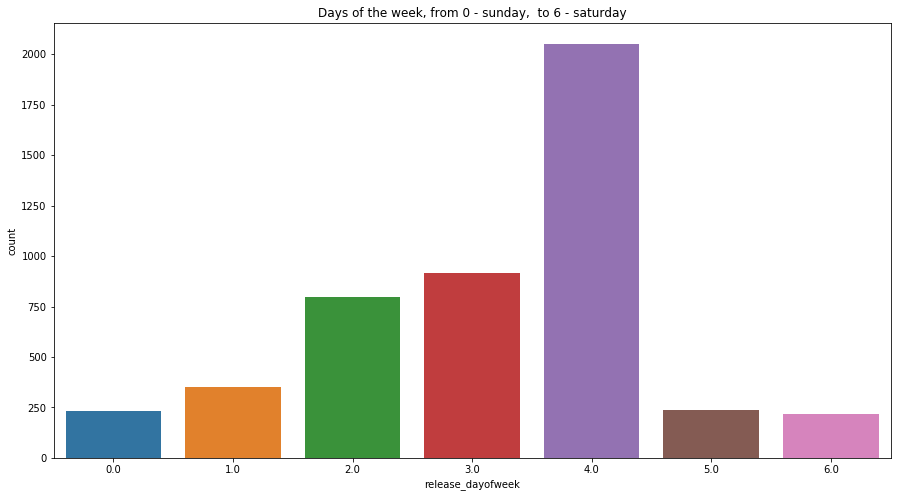

In [12]:

plt.figure(figsize=(15, 8))
sns.countplot(data['release_dayofweek'])
plt.title('Days of the week, from 0 - sunday,  to 6 - saturday')

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'Distribution of movies by month')

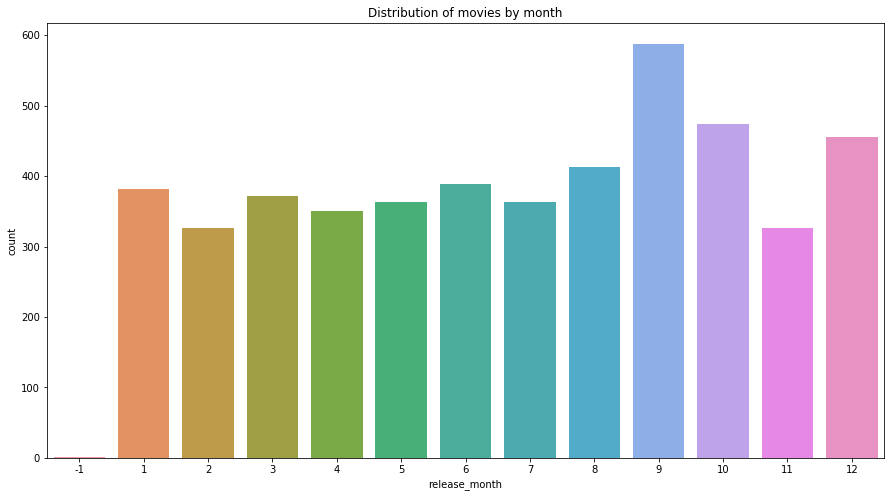

In [13]:
plt.figure(figsize=(15, 8))
sns.countplot(data['release_month']); plt.title('Distribution of movies by month')

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'Distribution of movies by days in a month')

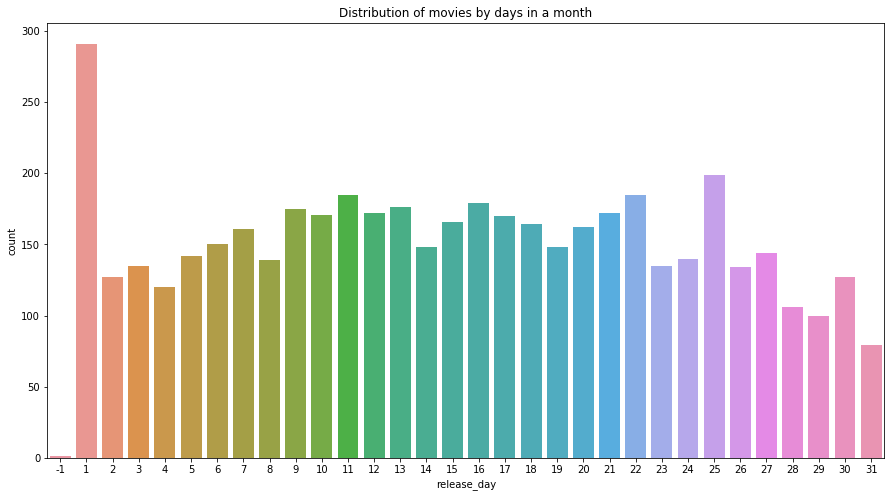

In [23]:
plt.figure(figsize=(15, 8))
sns.countplot(data['release_day']); plt.title('Distribution of movies by days in a month')

###  Data Description Report  

Issues found: 
- dates column 
- text to dict column

##  Exploratory Data  Analysis

This section handles the graphs and plots for data exploration. 

checking for outliers & anamolies in runtime, budget and revenue

**- Univariate visualization**

Univariate analysis looks at one feature at a time. When we analyze a feature independently, we are usually mostly interested in the distribution of its values and ignore other features in the dataset.

Below, we will consider different statistical types of features and the corresponding tools for their individual visual analysis.<br>

**- Quantitative features**  <br>

Quantitative features take on ordered numerical values. Those values can be discrete, like integers, or continuous, like real numbers, and usually express a count or a measurement. <br>
  **- Frequency distributions and class distributions**

Plotting distplot to check the distribution.

<Figure size 1152x720 with 0 Axes>

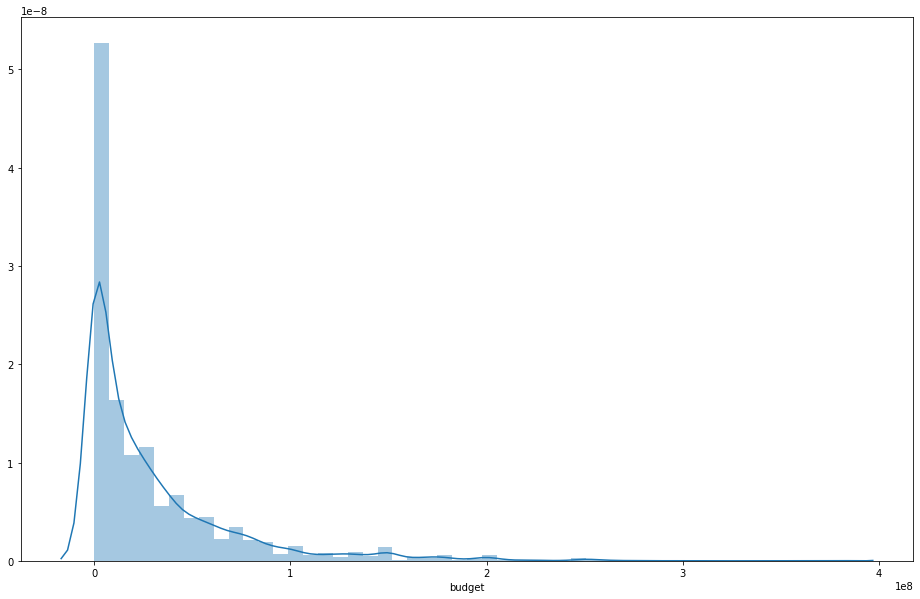

In [74]:
plt.figure(figsize =(16,10))
sns.distplot(con_data['budget'])

#### Analysis
the above plots show the 'budget' contain outliers, with distribution as positively skewed and a thin kurtosis.

In [14]:
# creating gen dataframe for genres to be compared against revenue, budget, runtime and status 
gen = con_data.loc[con_data['genres'].str.len()==1][
['genres','revenue','budget','runtime','status']].reset_index(drop = True)
gen['genres']= gen.genres.apply(lambda x :x[0]['name'])

#gen['genres'] = mvrevenue['genres'].str.extract('([A-Z]\w{0,})', expand=True )

gen.head()

,genres,revenue,budget,runtime,status
0,Action,1506249360,190000000,137.0,Released
1,Science Fiction,543934787,178000000,144.0,Released
2,Fantasy,299370084,170000000,113.0,Released
3,Adventure,301000000,150000000,99.0,Released
4,Comedy,202026112,100000000,90.0,Released


In [73]:
#del mv0

#mv0 = mvrevenue.copy()
#mv0 = mv0['genres'].str.extract('[^A-Za-z]+', expand=True )

#mv0 = mvrevenue['genres'].str.extract('([A-Z]\w{0,})', expand=True )

#mv0

In [15]:
genres = gen.groupby(gen.genres).agg('mean')

genres

,revenue,budget,runtime
genres,,,
Action,1.227577e+08,3.971429e+07,107.904762
Adventure,9.679045e+07,4.853846e+07,110.461538
Animation,1.231166e+08,4.950000e+07,93.000000
Comedy,5.707003e+07,2.031676e+07,96.184397
Crime,0.000000e+00,2.500000e+06,110.000000
Documentary,5.566236e+06,1.735243e+06,92.909091
Drama,3.436563e+07,1.298058e+07,114.425474
Family,0.000000e+00,0.000000e+00,74.000000
Fantasy,9.671589e+07,6.483333e+07,112.833333


<Figure size 1080x720 with 0 Axes>

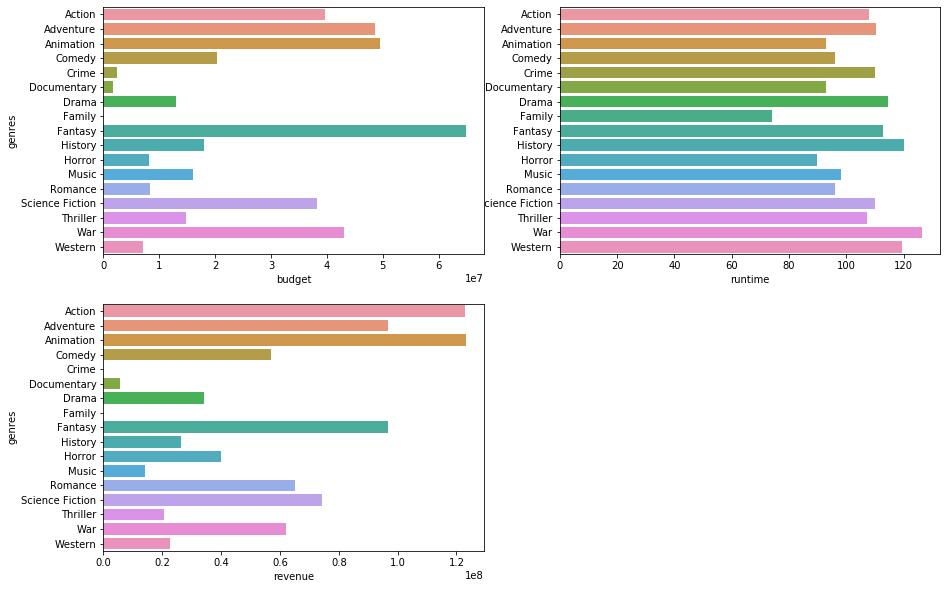

In [20]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,3)
sns.barplot(genres['revenue'],genres.index)

plt.subplot(2,2,2)
sns.barplot(genres['runtime'],genres.index)

plt.subplot(2,2,1)
sns.barplot(genres['budget'],genres.index)

In [34]:
# Class Distributions genres
class_counts = con_data.groupby('original_language').size()
class_counts

original_language
af       1
ar       2
cn      12
cs       2
da       7
de      26
el       1
en    4503
es      32
fa       4
fr      70
he       3
hi      19
hu       1
id       2
is       1
it      13
ja      16
ko      11
ky       1
nb       1
nl       4
no       1
pl       1
ps       1
pt       9
ro       2
ru      11
sl       1
sv       5
ta       2
te       1
th       3
tr       1
vi       1
xx       1
zh      27
dtype: int64

## - Data Preparation

DF backup before further modification

In [16]:
con_data2 = con_data
con_data.head(1)

,title,genres,id,keywords,original_language,overview,production_companies,production_countries,release_date,runtime,spoken_languages,status,budget,revenue,release_month,release_day,release_year
0,Avatar,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",19995,"[{'id': 1463, 'name': 'culture clash'}, {'id':...",en,"In the 22nd century, a paraplegic Marine is di...","[{'name': 'Ingenious Film Partners', 'id': 289...","[{'iso_3166_1': 'US', 'name': 'United States o...",12/10/2009,162.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,237000000,2787965087,12,10,2009


In [17]:
element = con_data2.iloc[0]['genres']
element

[{'id': 28, 'name': 'Action'},
 {'id': 12, 'name': 'Adventure'},
 {'id': 14, 'name': 'Fantasy'},
 {'id': 878, 'name': 'Science Fiction'}]

Converting the dictionary columns to extract the values

In [18]:
def parse_dict(raw_dict):
    return [d['name']  for d in raw_dict ]

In [40]:
con_data2

,title,genres,id,keywords,original_language,overview,production_companies,production_countries,release_date,runtime,spoken_languages,status,budget,revenue,release_month,release_day,release_year
0,Avatar,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",19995,"[{'id': 1463, 'name': 'culture clash'}, {'id':...",en,"In the 22nd century, a paraplegic Marine is di...","[{'name': 'Ingenious Film Partners', 'id': 289...","[{'iso_3166_1': 'US', 'name': 'United States o...",12/10/2009,162.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,237000000,2787965087,12,10,2009
1,Pirates of the Caribbean: At World's End,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",285,"[{'id': 270, 'name': 'ocean'}, {'id': 726, 'na...",en,"Captain Barbossa, long believed to be dead, ha...","[{'name': 'Walt Disney Pictures', 'id': 2}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...",5/19/2007,169.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,300000000,961000000,5,19,2007
2,Spectre,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",206647,"[{'id': 470, 'name': 'spy'}, {'id': 818, 'name...",en,A cryptic message from Bond’s past sends him o...,"[{'name': 'Columbia Pictures', 'id': 5}, {'nam...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",10/26/2015,148.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,245000000,880674609,10,26,2015
3,The Dark Knight Rises,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",49026,"[{'id': 849, 'name': 'dc comics'}, {'id': 853,...",en,Following the death of District Attorney Harve...,"[{'name': 'Legendary Pictures', 'id': 923}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...",7/16/2012,165.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,250000000,1084939099,7,16,2012
4,John Carter,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",49529,"[{'id': 818, 'name': 'based on novel'}, {'id':...",en,"John Carter is a war-weary, former military ca...","[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",3/7/2012,132.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,260000000,284139100,3,7,2012
5,Spider-Man 3,"[{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'na...",559,"[{'id': 851, 'name': 'dual identity'}, {'id': ...",en,The seemingly invincible Spider-Man goes up ag...,"[{'name': 'Columbia Pictures', 'id': 5}, {'nam...","[{'iso_3166_1': 'US', 'name': 'United States o...",5/1/2007,139.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,258000000,890871626,5,1,2007
6,Tangled,"[{'id': 16, 'name': 'Animation'}, {'id': 10751...",38757,"[{'id': 1562, 'name': 'hostage'}, {'id': 2343,...",en,When the kingdom's most wanted-and most charmi...,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...",11/24/2010,100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,260000000,591794936,11,24,2010
7,Avengers: Age of Ultron,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",99861,"[{'id': 8828, 'name': 'marvel comic'}, {'id': ...",en,When Tony Stark tries to jumpstart a dormant p...,"[{'name': 'Marvel Studios', 'id': 420}, {'name...","[{'iso_3166_1': 'US', 'name': 'United States o...",4/22/2015,141.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,280000000,1405403694,4,22,2015
8,Harry Potter and the Half-Blood Prince,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",767,"[{'id': 616, 'name': 'witch'}, {'id': 2343, 'n...",en,"As Harry begins his sixth year at Hogwarts, he...","[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",7/7/2009,153.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,250000000,933959197,7,7,2009
9,Batman v Superman: Dawn of Justice,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",209112,"[{'id': 849, 'name': 'dc comics'}, {'id': 7002...",en,Fearing the actions of a god-like Super Hero l...,"[{'name': 'DC Comics', 'id': 429}, {'name': 'A...","[{'iso_3166_1': 'US', 'name': 'United States o..

In [19]:
# One-Hot-Encoding for all nominal data

df = pd.get_dummies(gen)

df.head()

,revenue,budget,runtime,genres_Action,genres_Adventure,genres_Animation,genres_Comedy,genres_Crime,genres_Documentary,genres_Drama,...,genres_Horror,genres_Music,genres_Romance,genres_Science Fiction,genres_Thriller,genres_War,genres_Western,status_Post Production,status_Released,status_Rumored
0,1506249360,190000000,137.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,543934787,178000000,144.0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,299370084,170000000,113.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,301000000,150000000,99.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,202026112,100000000,90.0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


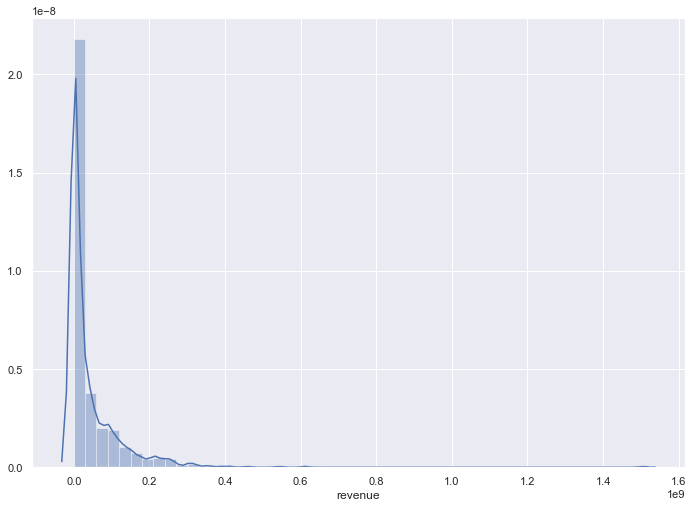

In [42]:
sns.set(rc={'figure.figsize':(11.7,8.27)})


sns.distplot(df['revenue'])

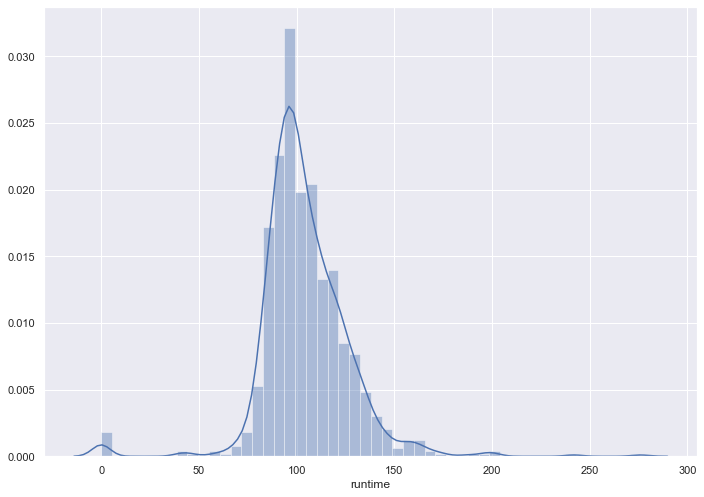

In [43]:
sns.set(rc={'figure.figsize':(11.7,8.27)})


sns.distplot(df['runtime'])

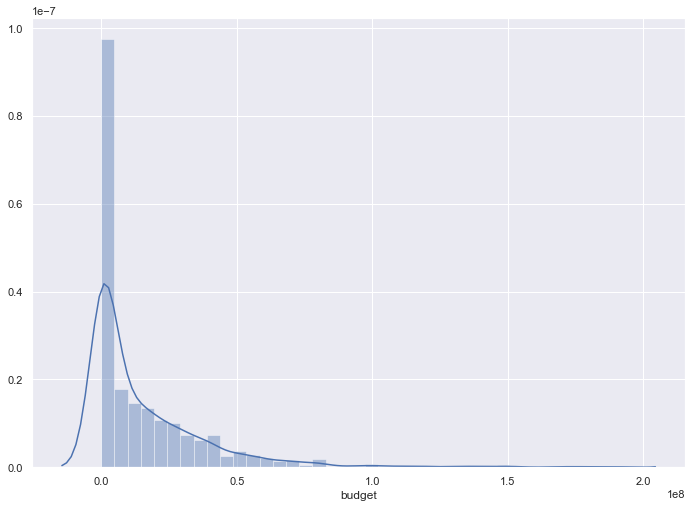

In [44]:
sns.set(rc={'figure.figsize':(11.7,8.27)})


sns.distplot(df['budget'])

In [20]:
# Skewness value
con_data.skew()

id               2.071986
runtime          0.739876
budget           2.436115
revenue          4.443129
release_month   -0.153424
release_day      0.022664
release_year    -2.170769
dtype: float64

## Modeling

In [21]:
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

In [22]:
df.head()

,revenue,budget,runtime,genres_Action,genres_Adventure,genres_Animation,genres_Comedy,genres_Crime,genres_Documentary,genres_Drama,genres_Family,genres_Fantasy,genres_History,genres_Horror,genres_Music,genres_Romance,genres_Science Fiction,genres_Thriller,genres_War,genres_Western,status_Post Production,status_Released,status_Rumored
0,1506249360,190000000,137.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,543934787,178000000,144.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,299370084,170000000,113.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
3,301000000,150000000,99.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,202026112,100000000,90.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [27]:
df.columns

Index(['revenue', 'budget', 'runtime', 'genres_Action', 'genres_Adventure',
       'genres_Animation', 'genres_Comedy', 'genres_Crime',
       'genres_Documentary', 'genres_Drama', 'genres_Family', 'genres_Fantasy',
       'genres_History', 'genres_Horror', 'genres_Music', 'genres_Romance',
       'genres_Science Fiction', 'genres_Thriller', 'genres_War',
       'genres_Western', 'status_Post Production', 'status_Released',
       'status_Rumored'],
      dtype='object')

## ## Split the data into training set and testing set using train_test_split
using scikit learn split the data-set

In [23]:
df = df[['budget', 'runtime', 'genres_Action', 'genres_Adventure',
       'genres_Animation', 'genres_Comedy', 'genres_Crime',
       'genres_Documentary', 'genres_Drama', 'genres_Family', 'genres_Fantasy',
       'genres_Horror', 'genres_Science Fiction', 'genres_Thriller',
       'genres_Western', 'status_Released','revenue']]

In [24]:
# Split-out validation dataset

X = df.drop('revenue', axis = 1)
Y = df.revenue
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [30]:
print(X_train)
print(X_validation)
print(Y_train)
print(Y_validation)

        budget  runtime  genres_Action  genres_Adventure  genres_Animation  genres_Comedy  genres_Crime  genres_Documentary  genres_Drama  genres_Family  genres_Fantasy  genres_Horror  genres_Science Fiction  genres_Thriller  genres_Western  status_Released
264  35000000   114.0    0              0                 0                 1              0             0                   0             0              0               0              0                       0                0               1              
22   79000000   91.0     0              0                 0                 1              0             0                   0             0              0               0              0                       0                0               1              
815  400000     95.0     0              0                 0                 1              0             0                   0             0              0               0              0                       0                

#### Running the Linear Regression Model

In [26]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
def rmsle(y,y0): return np.sqrt(np.mean(np.square(np.log1p(y)-np.log1p(y0))))
model = reg.fit(X,Y)
y_pred = reg.predict(X)
rmsle = rmsle(y_pred, Y)
print("The linear model has intercept : {}, and coefficients : {}, and the rmsle is {} ".format(model.intercept_, model.coef_, rmsle) )

The linear model has intercept : -14644620.058988929, and coefficients : [ 2.11893237e+00  2.61006990e+05  2.78379824e+07 -1.74944018e+07
  1.13518567e+07  6.30172914e+06 -1.66119971e+07 -5.00613574e+06
 -5.61654625e+06 -1.91841449e+06 -5.27157457e+07  1.68289014e+07
 -1.82836835e+07 -2.13612411e+07 -5.81668017e+06 -2.75148271e+06], and the rmsle is 9.36410874773492 


In [27]:
# Build and fit linear regression model
reg_lm = LinearRegression(normalize=True)
reg_lm.fit(X_train, Y_train)

# Calculate the predictions on the test set
pred = reg_lm.predict(X_validation)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [28]:
pred

array([-2.19615413e+06,  1.17301722e+08,  1.60152199e+07,  5.17659998e+06,
        4.75559258e+07, -4.62763531e+06,  1.10256610e+07,  4.09233613e+07,
        3.00847413e+07,  3.63919353e+07,  1.65019210e+06,  3.50653250e+07,
        5.67876503e+07,  1.24129311e+07,  4.40054836e+05, -1.38925141e+07,
       -5.13377653e+05,  1.33745176e+07,  3.95415235e+07,  2.77168851e+07,
        2.60362459e+06,  1.07141608e+08,  2.82808808e+07, -2.31106618e+07,
        6.85688571e+07,  2.21896516e+07,  4.64732552e+07,  1.04095993e+08,
        1.23267064e+08,  4.46069634e+07,  1.13076000e+07,  7.81273325e+07,
       -2.72981013e+05,  4.48208905e+05,  5.56320122e+07,  7.11336784e+07,
        7.02052020e+07,  7.59018404e+07, -1.23456757e+06,  1.38553109e+07,
        2.04842147e+07,  2.77263359e+06,  5.18494580e+06,  3.65717899e+07,
        3.91229167e+07,  1.07701943e+08,  6.00144998e+07, -1.64157930e+07,
        5.01360861e+07,  2.07852125e+08,  5.01574505e+06,  4.40054836e+05,
        1.89058874e+06,  

In [29]:
print('*************Y Shape***************')
Y_validation.shape

print('*************Pred Shape***************')
pred.shape

*************Y Shape***************


(180,)

*************Pred Shape***************


(180,)

### Assess Model 

In [30]:
# Evaluate the performance using the RMSE
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(Y_validation, pred))
print('RMSE: {:.3f}'.format(rmse))

RMSE: 64925743.344


In [31]:
# r2_score is between 0 & 1. 1 is best fit & 0 is worst fit
from sklearn.metrics import r2_score
print("r2_score",r2_score(Y_validation, pred))

r2_score 0.19900571473920703


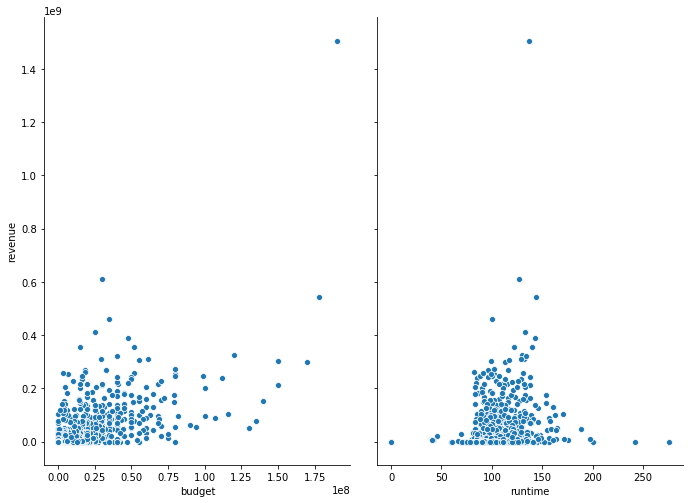

In [32]:
# visualize the relationship between the features and the response using scatterplots
# sns.pairplot(mvrevenue, x_vars=['budget','release_year','runtime'], y_vars='revenue', size=7, aspect=0.7)
sns.pairplot(df, x_vars=[ 'budget', 'runtime'], y_vars='revenue', size=7, aspect=0.7)


In [34]:
# create X and y
feature_cols = ['budget']
X = df[feature_cols]
y = df.revenue

# instantiate and fit
lm2 = LinearRegression()
lm2.fit(X, y)

# print the coefficients
print(lm2.intercept_)
print(lm2.coef_)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

8544030.1107831
[2.17718383]



### Interpreting Model Coefficients
Interpreting the budget coefficient ( β1 )

A "unit" increase in budget is associated with a 2.17718383 "units" increase in revenue Or more clearly: An additional $1,000 spent on budget is associated with an increase in sales of 2177.18383 widgets

Note here that the coefficients represent associations, not causations

## Plotting the Least Squares Line

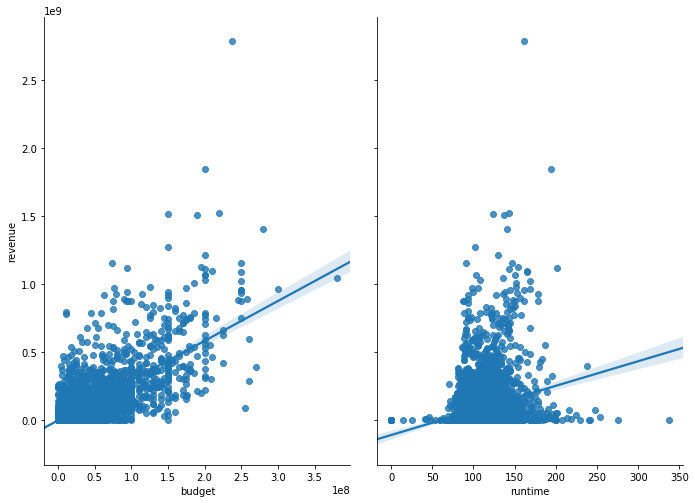

In [35]:
sns.pairplot(mvrevenue, x_vars=['budget'], y_vars='revenue', size=7, aspect=0.7, kind='reg')

In [36]:
# create X and y
feature_cols = ['budget','runtime']
X = df[feature_cols]
y = df.revenue

# # instantiate and fit
lm2 = LinearRegression()
lm2.fit(X, y)

# # print the coefficients
print(lm2.intercept_)
print(lm2.coef_)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

-5309987.732538827
[2.14442863e+00 1.37603060e+05]


In [37]:
# # instantiate and fit
lm2 = LinearRegression()
lm2.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

##  Predict with Linear Regression

In [38]:
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [39]:
#  Remove table meta data, column names   to use values for prediction.

# train_x = df_train_x.values
# train_y = df_train_y.values
# test_x  = df_test_x.values
# X_train = X_train.values
# Y_train = Y_train.values
#  Calculate the coefficients of the linear regression 
reg = LinearRegression().fit(X_train, Y_train)

#   Using linear regression model on the prepared test data
Y_validation = reg.predict(X_validation)

# Accuracy
print('Accuracy Linear Regression:', reg.score(X_validation, Y_validation))


Accuracy Linear Regression: 1.0


## Predicting with XGBOOST

In [40]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor(objective="reg:squarederror", random_state=7)

xgb_model.fit(X_train, Y_train)

Y_validation = xgb_model.predict(X_validation)

print('Accuracy XGB:', xgb_model.score(X_train, Y_train))

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=7, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

Accuracy XGB: 0.7066468166703885


### Trying with other algorithms 

In [41]:
# Test options and evaluation metric
num_folds = 10
num_instances = len(X_train)
seed = 7

# Listing the possible scoring matrix

r2_score = 'r2'
## metrics.r2_score

# Initiating the score matrix
scoring =  r2_score

In [44]:
random_seed = 12
outcome = []
model_names = []
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))
models.append(('XGB', xgb.XGBRegressor(objective="reg:squarederror")))

In [45]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits =10, random_state = random_seed)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv = kfold, scoring = scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.347419 (0.122490)
LASSO: 0.347419 (0.122490)
EN: 0.347420 (0.122491)
KNN: 0.263239 (0.159443)
CART: -0.094588 (0.291035)
SVR: -0.222887 (0.094258)
XGB: 0.334331 (0.146317)


In [46]:
# Validating  LR Score on Testing Set
LR_model = LinearRegression()
LR_model.fit(X_train, Y_train)
Y_validation = LR_model.predict(X_validation)
print('Accuracy LR:', LR_model.score(X_train, Y_train))


# Validating  LASSO Score on Testing Set
LASSO_model = Lasso()
LASSO_model.fit(X_train, Y_train)
Y_validation = LR_model.predict(X_validation)
print('Accuracy LASSO:', LASSO_model.score(X_train, Y_train))

# Validating  EN Score on Testing Set
EN_model = ElasticNet()
EN_model.fit(X_train, Y_train)
Y_validation = EN_model.predict(X_validation)
print('Accuracy EN:', EN_model.score(X_train, Y_train))

# Validating  KNN Score on Testing Set
KNN_model = KNeighborsRegressor()
KNN_model.fit(X_train, Y_train)
Y_validation = KNN_model.predict(X_validation)
print('Accuracy KNN:', KNN_model.score(X_train, Y_train))

# Validating  CART Score on Testing Set
CART_model = DecisionTreeRegressor()
CART_model.fit(X_train, Y_train)
Y_validation = CART_model.predict(X_validation)
print('Accuracy CART:', CART_model.score(X_train, Y_train))

# Validating  SVR Score on Testing Set
SVR_model = SVR()
SVR_model.fit(X_train, Y_train)
Y_validation = SVR_model.predict(X_validation)
print('Accuracy SVR:', SVR_model.score(X_train, Y_train))

# Validating  XGB Score on Testing Set
xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
xgb_model.fit(X_train, Y_train)
Y_validation = xgb_model.predict(X_validation)
print('Accuracy XGB:', xgb_model.score(X_train, Y_train))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Accuracy LR: 0.3829906441575285


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Accuracy LASSO: 0.3829906441575285


ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Accuracy EN: 0.38299064380781156


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

Accuracy KNN: 0.5296165934823194


DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

Accuracy CART: 0.9807880333053189


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

Accuracy SVR: -0.1582129454658463


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

Accuracy XGB: 0.7066468166703885


Text(0.5, 0.98, 'Algorithm Comparison')

{'whiskers': [<matplotlib.lines.Line2D at 0x1f729cf62e8>,
 'caps': [<matplotlib.lines.Line2D at 0x1f729cf6978>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f729ca9438>,
 'medians': [<matplotlib.lines.Line2D at 0x1f729cf6da0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1f729d01390>,
 'means': []}

[Text(0, 0, 'LR'),
 Text(0, 0, 'LASSO'),
 Text(0, 0, 'EN'),
 Text(0, 0, 'KNN'),
 Text(0, 0, 'CART'),
 Text(0, 0, 'SVR'),
 Text(0, 0, 'XGB')]

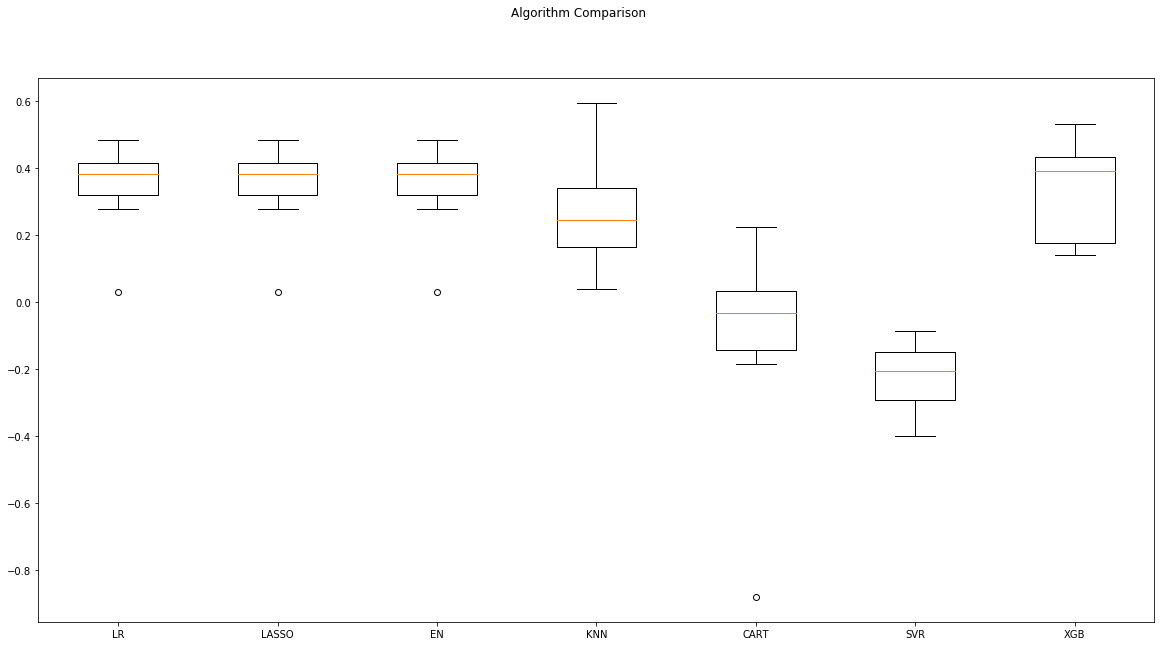

In [47]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()
plt.rcParams['figure.figsize'] = 14,10

###  Review Process Review of Process  

###  Determine Next Steps   

###  List of Possible Actions Decision  

###  Review Recommendations to Organization